# **Week 3** : Linear regression

Clone the AISaturdaysLagos Resources repo.

Navigate to the PyTorch **Week3/data** folder

In [2]:
!git clone https://github.com/AISaturdaysLagos/Resources.git

fatal: destination path 'Resources' already exists and is not an empty directory.


In [3]:
cd Resources/2018/cohort2/PyTorch/Week3/data/

/content/Resources/2018/cohort2/PyTorch/Week3/data


In [0]:
PATH = "/content/Resources/2018/cohort2/PyTorch/Week3/data"


**Import PyTorch dependencies**

In [0]:
from os import path
from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())

accelerator = 'cu80' if path.exists('/opt/bin/nvidia-smi') else 'cpu'

!pip install -q http://download.pytorch.org/whl/{accelerator}/torch-0.3.0.post4-{platform}-linux_x86_64.whl torchvision


In [0]:
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader


**Data analysis**

 np.genfromtxt('birth_life_2010.txt',delimiter='\t',usecols=(1,2), skip_header=1, dtype=np.double)

In [0]:
data = np.genfromtxt('birth_life_2010.txt',delimiter='\t', usecols=(1,2), skip_header=1, dtype=np.double)
#data = np.genfromtxt('birth_life_2010.txt',delimiter='\t', skip_header=1, dtype=np.double)

In [0]:
data

sample: **data[0]**

In [15]:
data[0]

array([ 1.822    , 74.8282439])

**data.shape**

In [16]:
data.shape

(190, 2)

**Reshape** train_ = np.reshape(data[], (reshape dimension))

In [0]:
train_x = np.reshape(data[:,0], (190,1))
train_y = np.reshape(data[:,1], (190,1))

Verify the shape

In [19]:
train_x.shape

(190, 1)

Convert numpy **ndarray** to **torch tensor**  

1.  x_data = torch.from_numpy(train_x)
2.   y_data = torch.from_numpy(train_y)



In [0]:
x_data = torch.from_numpy(train_x)
y_data = torch.from_numpy(train_y)

Verify the** type(x_data)**

In [21]:
type(x_data)

torch.DoubleTensor

In [22]:
x_data.shape

torch.Size([190, 1])

**Data Analysis and  VIsualization**

In [23]:
Nigeria = data[159]
print(Nigeria)

[ 5.525      51.41002439]


In [25]:
India = data[141]
print(India)

[ 2.625      65.13134146]


In [26]:
China = data[21]
print(China)

[ 1.108      82.87804878]


In [27]:
Japan = data[19]
print(Japan)

[ 1.39       82.93268293]


Visualization **import matplotlib.pyplot as plt**

In [0]:
import matplotlib.pyplot as plt

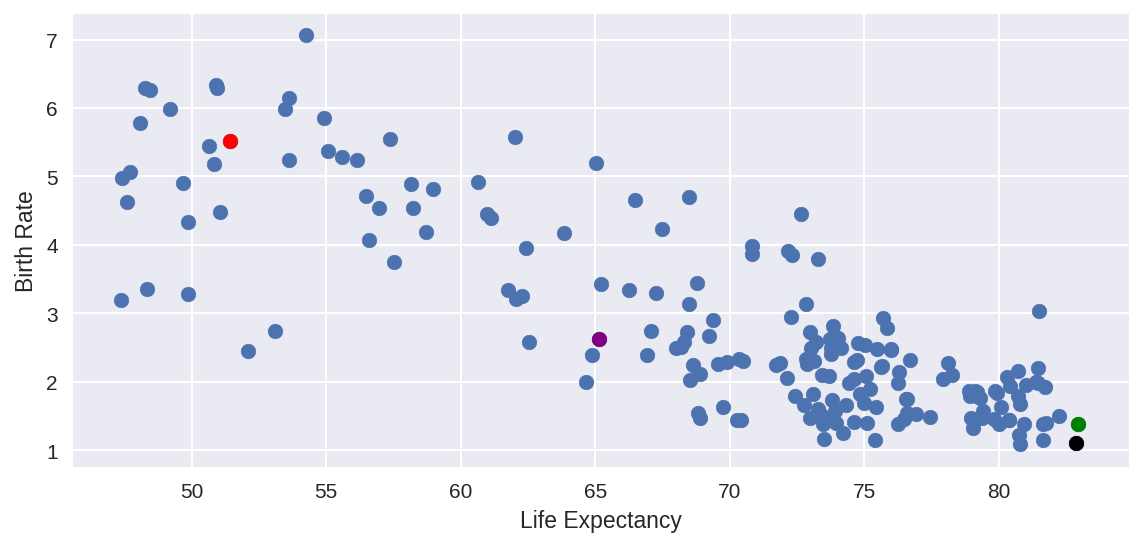

In [29]:

# Plotting example dataset# Plottin 
plt.figure(figsize = (20,4),dpi=150)
plt.subplot(121)
plt.scatter(y_data,x_data)

# Country with data
plt.scatter(y_data[159],x_data[159], color='red') # Nigeria
plt.scatter(y_data[21],x_data[21], color='black') # China
plt.scatter(y_data[141],x_data[141], color='purple') # India
plt.scatter(y_data[19],x_data[19], color='green') # Japan

# Axis label
plt.ylabel("Birth Rate")
plt.xlabel("Life Expectancy")
plt.show()

**Linear regression **


> Import torch.nn as nn



In [0]:
import torch.nn as nn

In [0]:
#Step 1: Create Model Class

# Linear Regression Model
class LinearRegression(nn.Module):
    def __init__(self):
        super(LinearRegression, self).__init__()
        self.linear = nn.Linear(1, 1)  # input and output is 1 dimension

    def forward(self, x):
        out = self.linear(x)
        return out

In [0]:
#Step 2: Instantiate Model Class
model = LinearRegression()

**learning rate** = 0.001

In [0]:
criterion = nn.MSELoss()
learning_rate = 0.001

#Step 4: Instantiate Optimizer class
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

**Variable: Wrapper for Tensor 😊**


> from torch.autograd import Variable



In [0]:
from torch.autograd import Variable

In [0]:
epochs =  10000

In [37]:
# Step 5: Train Model# Step 5 

for epoch in range(epochs):
    epoch += 1
    # Convert numpy array to torch Variable
    inputs = Variable((x_data)).float()
    labels = Variable((y_data)).float()
    
    
    #Clear gradient w.r.t parameters(To prevent updating with  previous gradient)
    optimizer.zero_grad()
    
    #Forward to get output
    outputs = model(inputs)
    
    
    #Calculate Loss
    loss = criterion(outputs, labels)
    
    
    # Getting gradients w.r.t parameters (scalar loss)
    loss.backward()
    
    #updating parameters (m and b)
    optimizer.step()
    
    if epoch % 500 ==0:
      print('epoch {}, loss {}'.format(epoch, loss.data[0]))
    
    

epoch 500, loss 933.1521606445312
epoch 1000, loss 651.819091796875
epoch 1500, loss 458.1458740234375
epoch 2000, loss 324.8188171386719
epoch 2500, loss 233.03451538085938
epoch 3000, loss 169.84878540039062
epoch 3500, loss 126.35090637207031
epoch 4000, loss 96.40625
epoch 4500, loss 75.79206085205078
epoch 5000, loss 61.600975036621094
epoch 5500, loss 51.83156204223633
epoch 6000, loss 45.10616683959961
epoch 6500, loss 40.47639846801758
epoch 7000, loss 37.289207458496094
epoch 7500, loss 35.09502029418945
epoch 8000, loss 33.58454895019531
epoch 8500, loss 32.5446891784668
epoch 9000, loss 31.828842163085938
epoch 9500, loss 31.336027145385742
epoch 10000, loss 30.996780395507812


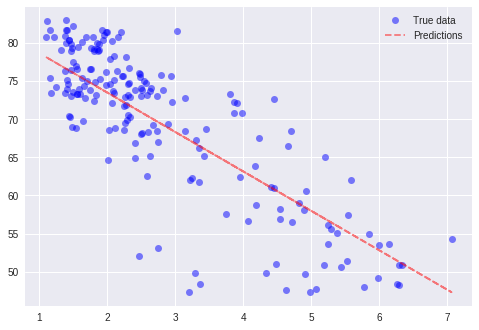

In [38]:
# Clear figure
plt.clf()

# Get predictions
predicted = model(Variable((x_data.float()))).data.numpy()

# Plot true data
plt.plot(x_data.numpy(), y_data.numpy(), 'go', label= 'True data', alpha=.5, color='blue')

# Plot predictions
plt.plot(x_data.numpy(), predicted, '--', label="Predictions", alpha=.5, color='red')


# Legend and plot
plt.legend(loc='best')
plt.show()

In [0]:
print(model.state_dict())

Equation of a line y =** ?**x +** ?**

# **Logistic Regression**

Predicting Probability 


> Linear regression does not work

>Instead of predicting direct values**: predict probability**


torchvision for image dataloading

In [0]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms

-  **Note**: train_dataset train=**True**  and test_dataset=**False**



In [0]:
train_dataset = torchvision.datasets.MNIST(root='../../data', 
                                           train=True, 
                                           transform=transforms.ToTensor(),
                                           download=True)

test_dataset = torchvision.datasets.MNIST(root='../../data', 
                                          train=False, 
                                          transform=transforms.ToTensor())



-  **Note**: train_loader shuffle=**True**(Avoid overfitting) and test_loader=shuffle=**False**

In [0]:
# Data loader (input pipeline)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=100, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=100, 
                                          shuffle=False)

**Data analysis and Data visualization**

In [43]:
len(train_dataset)

60000

In [44]:

len(test_dataset)

10000

In [45]:
train_dataset[0]

(
 (0 ,.,.) = 
 
 Columns 0 to 8 
    0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000
   0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000
   0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000
   0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000
   0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000
   0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000
   0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.1176
   0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.1922  0.9333
   0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0706  0.8588
   0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.3137
   0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000
   0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000
   0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000
   

In [47]:
type(train_dataset[0])


tuple

Input size:   **28px * 28px**

In [48]:
train_dataset[0][0].size()

torch.Size([1, 28, 28])

Do you know why the **1 **?

The true label

In [49]:
train_dataset[0][1]

5

**Visualization of  MNIST**

In [0]:
import matplotlib.pyplot as plt

In [51]:
train_dataset[0][0].numpy().shape

(1, 28, 28)

In [0]:
show_img = train_dataset[0][0].numpy().reshape(28,28)

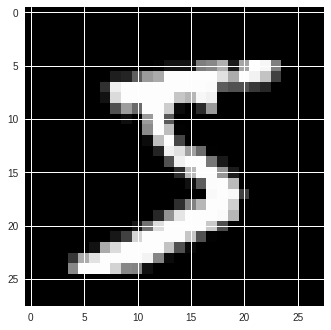

In [53]:
plt.imshow(show_img, cmap='gray')

In [54]:
# Label
train_dataset[0][1]

5

**Make the Dataset Iterable**

- Aim: make the dataset iterable
- **totaldata** : 6000
- **minibatch**: 100
-**iterations**: 3000
-**epochs**
     - 1 epoch: running through the  whole dataset once
     - $epochs = iterations  \div \frac {totalbatch}{minibatch} = 3000 \div \frac{6000}{100}= 5$



In [55]:
len(train_dataset)

60000

In [0]:
batch_size = 100
n_iters = 3000

In [57]:
num_epochs = (int)(n_iters / (len(train_dataset) / batch_size))
num_epochs

5

**Building Model**

In [0]:
# This is the same as linear regression

class LogisticRegressionModel(nn.Module):
  def __init__(self,input_dim,output_dim):
    super(LogisticRegressionModel, self).__init__()
    self.linear = nn.Linear(input_dim, output_dim)
    
  def forward(self,x):
    out = self.linear(x)
    return out

**step ?: Instantiate Model Class**
- Input dimension:
  - Size of image
  - 28 x 28
- Output dimension: 10
  - 0,1,2,3,4,5,6,7,8,9,
 

In [59]:
# Size of images
train_dataset[0][0].size()

torch.Size([1, 28, 28])

In [0]:
input_dim = 28*28
output_dim = 10

model = LogisticRegressionModel(input_dim, output_dim)

Step 5: Instantiate Loss Class
- Logistic Regression: Cross Entropy Loss
  - Linear Regression : MSE

What happens in nn.CrossEntropyLoss() --- add pic
- Computes softmax(logistic/softmax function)
- Computes cross entropy

In [0]:
criterion = nn.CrossEntropyLoss()

Instantiate Optimizer Class

In [0]:
learning_rate = 0.001

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

Parameters In-Depth

In [0]:
mp = model.parameters()

In [64]:
print(mp)
#print(list(mp)[1].size())  # Funny though
print(list(mp)[0].size())

<generator object Module.parameters at 0x7f870a9a6d58>
torch.Size([10, 784])


**Variable: Wrapper for Tensor 😊**


> from torch.autograd import Variable



In [0]:
from torch.autograd import Variable

In [66]:
iter = 0
for epoc in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
    
        # Load images as Variables
        images = Variable(images.view(-1, 28 * 28))
        labels = Variable(labels)
        
        # Clear gradients w.r.t parameters
        optimizer.zero_grad()
        
        # Forward pass to get output/logits
        outputs = model(images)
        
        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)
        
        # Getting gradients w.r.t parameters
        loss.backward()
        
        # Updating parameters
        optimizer.step()
        
        iter +=1 
        
        if iter % 500 == 0:
          # Calculate Accuracy
          correct = 0
          total = 0
          # Iterate through test dataset
          for images, labels in test_loader:
            #
              images = Variable(images.view(-1, 28 * 28))
              
              # Forward pass only to get logits/output
              outputs = model(images)
              
              # Get predictions from the maximum value
              _, predicted = torch.max(outputs.data, 1)
              
              # Total number of labels
              total += labels.size(0)
              
              # Total correct predictions
              correct += (predicted == labels).sum()
              
          accurarcy = 100 * correct / total
          
          # Print Loss
          
          print('Iteration: {}.Loss: {}. Accuracy: {}'.format(iter, loss.data[0], accurarcy))

Iteration: 500.Loss: 1.8602638244628906. Accuracy: 68.05
Iteration: 1000.Loss: 1.5452009439468384. Accuracy: 76.1
Iteration: 1500.Loss: 1.3630366325378418. Accuracy: 78.85
Iteration: 2000.Loss: 1.1978760957717896. Accuracy: 81.04
Iteration: 2500.Loss: 1.0654972791671753. Accuracy: 81.98
Iteration: 3000.Loss: 0.98313307762146. Accuracy: 82.8


In [67]:
print(model)

LogisticRegressionModel(
  (linear): Linear(in_features=784, out_features=10)
)


**Flatten images**

In [0]:
a = torch.Tensor([1,2,3,4,5])
a


In [0]:
a.shape

In [0]:
a = a.unsqueeze(0)
a

In [0]:
b = torch.Tensor([1,2,3,4,5])

In [0]:
b.view(1,-1)

**Testing of images**

In [68]:
iter_test = 0
for images, labels in test_loader:
  iter_test +=1
  images = Variable(images.view(-1, 28*28))
  outputs = model(images)
  if iter_test == 1:
    print("OUTPUTS")
    print(outputs.size())
    print(outputs[0, :])
    _, predicted = torch.max(outputs.data, 1)

OUTPUTS
torch.Size([100, 10])
Variable containing:
-0.3925
-1.4462
-0.3311
-0.2511
 0.1875
-0.2688
-1.1320
 2.8711
-0.0762
 1.0515
[torch.FloatTensor of size 10]



In [0]:
show_img = test_dataset[0][0].numpy().reshape(28,28)

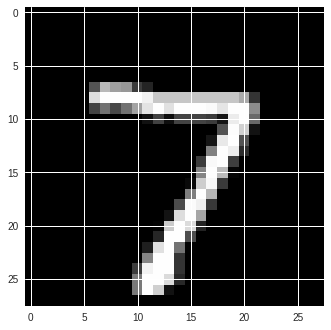

In [70]:
plt.imshow(show_img, cmap='gray')

In [71]:
# Label
test_dataset[0][1]

7

**Save Model**

In [0]:
save_model = False
if save_model is True:
  # Save only parameters
  torch.save(model.state_dict(), "/content/Resources/2018/cohort2/PyTorch/Week3/data/mnist_model.pkl")

# Change to GPU : It is fine 😊😊😊😊(Take home)

Change **model** and **Variable**